In [32]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
from sklearn.preprocessing import StandardScaler;
from sklearn.model_selection import train_test_split;
from sklearn.linear_model import LogisticRegression;
from sklearn.tree import DecisionTreeClassifier;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.metrics import mean_squared_error,r2_score;
import seaborn as sns;



In [33]:
df=pd.read_csv('./drug200.csv')

In [34]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [35]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [37]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


<Figure size 1500x600 with 0 Axes>

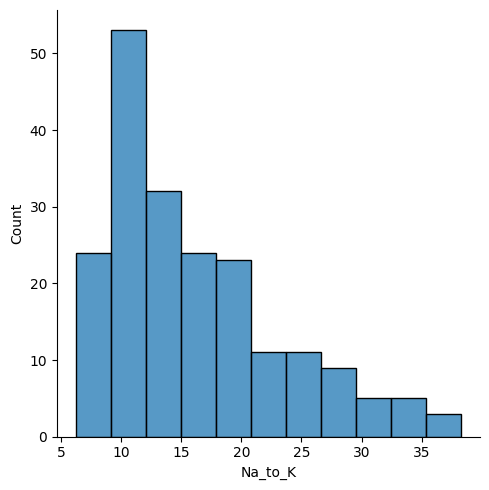

In [38]:
plt.figure(figsize=(15,6))
sns.displot(df['Na_to_K'])
plt.show()


In [39]:
cat_f=[f for f in df.columns if df[f].dtype =='O']
num_f=[f for f in df.columns if df[f].dtype !='O']

In [40]:
print(cat_f,num_f)

['Sex', 'BP', 'Cholesterol', 'Drug'] ['Age', 'Na_to_K']


In [41]:
from sklearn.preprocessing import LabelEncoder;

encoder=LabelEncoder()

In [42]:
df['Sex']=encoder.fit_transform(df['Sex'])

In [43]:
df['BP']=encoder.fit_transform(df['BP'])

In [44]:
df['Cholesterol']=encoder.fit_transform(df['Cholesterol'])

In [45]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

In [46]:
df['Drug']=encoder.fit_transform(df['Drug'])

In [47]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [48]:
df['Drug'].value_counts()

Drug
0    91
4    54
1    23
3    16
2    16
Name: count, dtype: int64

In [49]:
X=df.drop(columns=['Drug'])
Y=df['Drug']

In [50]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [51]:
print(X.shape,X_train.shape,X_test.shape)
print(Y.shape,Y_train.shape,Y_test.shape)


(200, 5) (160, 5) (40, 5)
(200,) (160,) (40,)


## TESTING MULTIPLE MODELS

In [52]:
models={
    'LogisticRegression':LogisticRegression(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
}

In [53]:
evaluation=[]
for i in range(len(models)):
    model=list(models.values())[i]
    model.fit(X_train,Y_train)
    y_pred=model.predict(X_test)

    accuracy=r2_score(y_pred,Y_test)
    print(f"Model {model} accuracy: {accuracy}")
    evaluation.append(accuracy)

Model LogisticRegression() accuracy: 0.804028307022319
Model DecisionTreeClassifier() accuracy: 1.0
Model RandomForestClassifier() accuracy: 1.0


c:\Users\Kanishka\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
model=DecisionTreeClassifier()

## HYPERPARAMETER TUNING

In [55]:
params={
    'max_depth':[1,2,3,4,5],
    'min_samples_split':[0.1,0.2,0.3,0.4],
    'criterion':['gini','entropy','log_loss']
}

In [56]:
params

{'max_depth': [1, 2, 3, 4, 5],
 'min_samples_split': [0.1, 0.2, 0.3, 0.4],
 'criterion': ['gini', 'entropy', 'log_loss']}

In [57]:
from sklearn.model_selection import GridSearchCV;

In [58]:
grid=GridSearchCV(estimator=model,param_grid=params,cv=10)

In [59]:
grid.fit(X_train,Y_train)
y_pred=grid.predict(X_test)

In [60]:
y_pred

array([3, 4, 0, 0, 0, 4, 4, 4, 0, 4, 1, 0, 0, 0, 2, 3, 0, 0, 4, 0, 0, 4,
       4, 4, 0, 0, 0, 0, 0, 4, 4, 3, 1, 4, 0, 0, 4, 0, 1, 4])

## CHECK ACCURACY

In [61]:
# Evaluate on training data
grid.fit(X_train,Y_train)
train_pred = grid.predict(X_train)
train_r2 = r2_score(Y_train, train_pred)

# Evaluate on test data
test_pred = grid.predict(X_test)
test_r2 = r2_score(Y_test, test_pred)

print(f"Training R2 Score: {train_r2}")
print(f"Test R2 Score: {test_r2}")


Training R2 Score: 1.0
Test R2 Score: 1.0


In [ ]:
# Drug
# 0      DrugY
# 4      drugX
# 1      drugA
# 3      drugC
# 2      drugB
